In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.signal import savgol_filter, find_peaks
from scipy.optimize import curve_fit

In [4]:
from scipy.integrate import simps

In [5]:
import single_photon_model as spm

In [6]:
cavity = spm.cSIV(g = 2*pi*5, kappa = 2*pi*50, gamma = 2*pi*0.1, \
                  gammaf = 2*pi*0.01, nu = 406706*np.pi, omega12 = 406706*np.pi, omegaC = 406706*np.pi) # object

In [7]:
def sanitize_data(datax, datay):
    x = datax[np.where(datay > 0.025*max(datay))]
    x = x - x[0]
    y = datay[np.where(datay > 0.025*max(datay))]
    y = y/max(y)
    return x, y

## Fitting an ideal photon shape

### making a photon 

In [142]:
amps10 = [1]*10
mus10 = [5]*10
sigmas10 = [1]*10

In [143]:
time = np.linspace(0, 100, 1000)
pulse10 = spm.n_gaussian(time, *[*amps10, *mus10, *sigmas10]) # from single_photon_model

Text(0.5, 0, 'Time (ns)')

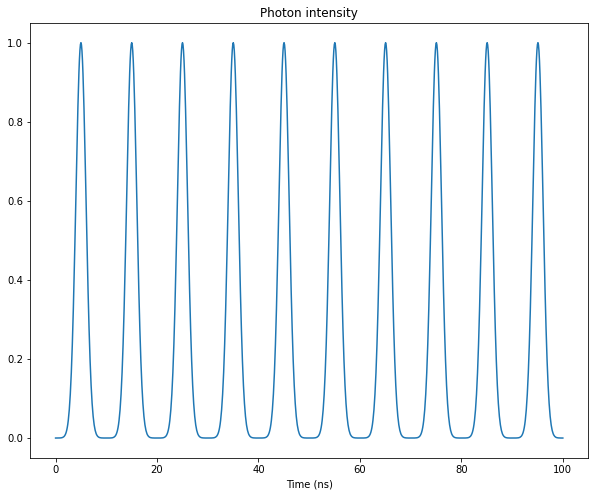

In [144]:
figure(figsize(10, 8))
plot(time, pulse10)
title("Photon intensity")
xlabel("Time (ns)")

### fitting given ideal photon shape

[5.005005005005005, 5.105105105105107, 5.205205205205207, 5.305305305305307, 5.405405405405411, 5.5055055055055035, 5.605605605605611, 5.705705705705711, 5.805805805805804, 5.905905905905911]
(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 5.005005005005005, 5.105105105105107, 5.205205205205207, 5.305305305305307, 5.405405405405411, 5.5055055055055035, 5.605605605605611, 5.705705705705711, 5.805805805805804, 5.905905905905911, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
(0.1000000001, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 5.005005005005005, 5.105105105105107, 5.205205205205207, 5.305305305305307, 5.405405405405411, 5.5055055055055035, 5.605605605605611, 5.705705705705711, 5.805805805805804, 5.905905905905911, 1.0, 1.0, 1.0, 1.

(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 5.005005005005005, 5.105105105105107, 5.205205205205207, 5.305305305305307, 5.405405405405411, 5.5055055055055035, 5.605605605605611, 5.705705705705711, 5.805805805805804, 6.496496496496502, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 5.005005005005005, 5.105105105105107, 5.205205205205207, 5.305305305305307, 5.405405405405411, 5.5055055055055035, 5.605605605605611, 5.705705705705711, 5.805805805805804, 5.905905905905911, 1.1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)
(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222

(0.18116411973388144, 0.17713026254460318, 0.20271951795221904, 0.23415269520088988, 0.2938599130844911, 0.35741134783272116, 0.39016476027243263, 0.5785648242876238, 1.071851091871724, 2.044831148930435, 6.038645961006576, 4.637012752354912, 4.825080017312148, 4.940045061121075, 5.024692213671318, 5.053128295508124, 5.001225600725426, 4.963055093793795, 4.903073820472574, 4.744230357927261, 1.0086582114369944, 1.0762940364463034, 1.0884917573411412, 1.0791851001351276, 1.075929004949505, 1.110413642210201, 1.2835665402891472, 1.4018090298448553, 1.4440489905239828, 1.5043233709599473)
(0.18116411973388144, 0.17713026254460318, 0.20271951795221904, 0.23415269520088988, 0.2938599130844911, 0.35741134783272116, 0.39016476027243263, 0.5785648242876238, 1.071851091871724, 2.044831148930435, 5.489678146369615, 5.100714027590403, 4.825080017312148, 4.940045061121075, 5.024692213671318, 5.053128295508124, 5.001225600725426, 4.963055093793795, 4.903073820472574, 4.744230357927261, 1.0086582114

(0.18116411973388144, 0.17713026254460318, 0.20271951795221904, 0.23415269520088988, 0.2938599130844911, 0.35741134783272116, 0.39016476027243263, 0.5785648242876238, 1.071851091871724, 2.044831148930435, 5.489678146369615, 4.637012752354912, 4.825080017312148, 4.940045061121075, 5.024692213671318, 5.053128295508124, 5.001225600725426, 4.963055093793795, 4.903073820472574, 4.744230357927261, 1.0086582114369944, 1.0762940364463034, 1.0884917573411412, 1.0791851001351276, 1.1835219054444555, 1.110413642210201, 1.2835665402891472, 1.4018090298448553, 1.4440489905239828, 1.5043233709599473)
(0.18116411973388144, 0.17713026254460318, 0.20271951795221904, 0.23415269520088988, 0.2938599130844911, 0.35741134783272116, 0.39016476027243263, 0.5785648242876238, 1.071851091871724, 2.044831148930435, 5.489678146369615, 4.637012752354912, 4.825080017312148, 4.940045061121075, 5.024692213671318, 5.053128295508124, 5.001225600725426, 4.963055093793795, 4.903073820472574, 4.744230357927261, 1.008658211

(0.14686276785659816, 0.1674678037952962, 0.1891079142651453, 0.2140088750129763, 0.24895389021720526, 0.2769852861285784, 0.34317034716923966, 0.42404570778296863, 0.46882443964778664, 0.30074282292578736, 5.073918726698047, 5.407348559961985, 4.911230011604148, 4.887644724875234, 4.884565011050598, 4.855842615983538, 4.8557461889395075, 4.974367787020554, 5.2202017554081905, 5.929133734770432, 1.010960836138725, 0.9356449746087548, 0.9338488503551226, 0.9402937514244503, 0.936748058026736, 0.9620652711550428, 0.9697500300406814, 0.998578387517822, 1.0068263865188911, 0.9497361277019102)
(0.14686276785659816, 0.1674678037952962, 0.1891079142651453, 0.2140088750129763, 0.24895389021720526, 0.2769852861285784, 0.34317034716923966, 0.42404570778296863, 0.46882443964778664, 0.30074282292578736, 5.073918726698047, 4.915771418147259, 5.4023530127645625, 4.887644724875234, 4.884565011050598, 4.855842615983538, 4.8557461889395075, 4.974367787020554, 5.2202017554081905, 5.929133734770432, 1.01

(0.14686276785659816, 0.1674678037952962, 0.1891079142651453, 0.2140088750129763, 0.24895389021720526, 0.2769852861285784, 0.34317034716923966, 0.42404570778296863, 0.46882443964778664, 0.30074282292578736, 5.073918726698047, 4.915771418147259, 4.911230011604148, 4.887644724875234, 4.884565011050598, 4.855842615983538, 4.8557461889395075, 4.974367787020554, 5.2202017554081905, 5.929133734770432, 1.010960836138725, 0.9356449746087548, 0.9338488503551226, 0.9402937514244503, 0.936748058026736, 0.9620652711550428, 1.0697500300406815, 0.998578387517822, 1.0068263865188911, 0.9497361277019102)
(0.14686276785659816, 0.1674678037952962, 0.1891079142651453, 0.2140088750129763, 0.24895389021720526, 0.2769852861285784, 0.34317034716923966, 0.42404570778296863, 0.46882443964778664, 0.30074282292578736, 5.073918726698047, 4.915771418147259, 4.911230011604148, 4.887644724875234, 4.884565011050598, 4.855842615983538, 4.8557461889395075, 4.974367787020554, 5.2202017554081905, 5.929133734770432, 1.010

(0.1387193914098614, 0.16139769183619856, 0.1827151582182153, 0.20900263381162862, 0.24464148425284324, 0.28671021744736125, 0.36236026342847727, 0.5043065952375778, 0.7101787899209768, 0.8115550954841654, 4.902342100212142, 4.903473242453755, 4.907162804516557, 4.908069081178028, 4.913866286672279, 4.915742978739015, 4.934836486417114, 4.968131226821214, 4.935786413903285, 4.494979045157671, 1.0027143445969822, 0.9594823469255556, 0.9541745763467114, 0.9548548396071177, 0.9553640868913718, 0.9836950052619086, 0.9917321722366296, 0.9919912491477847, 1.1074812420440212, 1.489288025107386)
(0.1387193914098614, 0.16139769183619856, 0.1827151582182153, 0.20900263381162862, 0.24464148425284324, 0.28671021744736125, 0.36236026342847727, 0.5043065952375778, 0.7101787899209768, 0.7115550954841654, 5.3925763102333555, 4.903473242453755, 4.907162804516557, 4.908069081178028, 4.913866286672279, 4.915742978739015, 4.934836486417114, 4.968131226821214, 4.935786413903285, 4.494979045157671, 1.002714

(0.1387193914098614, 0.16139769183619856, 0.1827151582182153, 0.20900263381162862, 0.24464148425284324, 0.28671021744736125, 0.36236026342847727, 0.5043065952375778, 0.7101787899209768, 0.7115550954841654, 4.902342100212142, 4.903473242453755, 4.907162804516557, 4.908069081178028, 4.913866286672279, 4.915742978739015, 4.934836486417114, 4.968131226821214, 4.935786413903285, 4.494979045157671, 1.0027143445969822, 0.9594823469255556, 0.9541745763467114, 0.9548548396071177, 0.9553640868913718, 1.0836950052619085, 0.9917321722366296, 0.9919912491477847, 1.1074812420440212, 1.489288025107386)
(0.1387193914098614, 0.16139769183619856, 0.1827151582182153, 0.20900263381162862, 0.24464148425284324, 0.28671021744736125, 0.36236026342847727, 0.5043065952375778, 0.7101787899209768, 0.7115550954841654, 4.902342100212142, 4.903473242453755, 4.907162804516557, 4.908069081178028, 4.913866286672279, 4.915742978739015, 4.934836486417114, 4.968131226821214, 4.935786413903285, 4.494979045157671, 1.0027143

(0.14064900150714274, 0.15900164967202443, 0.17957998978919995, 0.2057858242345962, 0.24082661291666, 0.28653875482132307, 0.35932121269902195, 0.486327798833591, 0.8007966373117321, 1.1887353567130297, 4.889073150097229, 4.901295677147244, 4.906040237253118, 4.910681281968543, 4.91765042261698, 4.922152454509586, 4.937637187552171, 4.966090606610203, 5.019515080997275, 5.5477554682501635, 0.9824784231868924, 0.9654804233426202, 0.9615811382424355, 0.9586275124076727, 0.9547953106557895, 0.9607400164981303, 0.9578068706672126, 0.9460961782836412, 0.9756380158154635, 1.0413557800515858)
(0.14064900150714274, 0.15900164967202443, 0.17957998978919995, 0.2057858242345962, 0.24082661291666, 0.28653875482132307, 0.35932121269902195, 0.486327798833591, 0.7007966373117321, 1.3076088923843325, 4.889073150097229, 4.901295677147244, 4.906040237253118, 4.910681281968543, 4.91765042261698, 4.922152454509586, 4.937637187552171, 4.966090606610203, 5.019515080997275, 5.5477554682501635, 0.982478423186

(0.14064900150714274, 0.15900164967202443, 0.17957998978919995, 0.2057858242345962, 0.24082661291666, 0.28653875482132307, 0.35932121269902195, 0.486327798833591, 0.7007966373117321, 1.1887353567130297, 4.889073150097229, 4.901295677147244, 4.906040237253118, 4.910681281968543, 4.91765042261698, 4.922152454509586, 4.937637187552171, 4.966090606610203, 5.019515080997275, 5.5477554682501635, 0.9824784231868924, 0.9654804233426202, 0.9615811382424355, 1.0586275124076727, 0.9547953106557895, 0.9607400164981303, 0.9578068706672126, 0.9460961782836412, 0.9756380158154635, 1.0413557800515858)
(0.14064900150714274, 0.15900164967202443, 0.17957998978919995, 0.2057858242345962, 0.24082661291666, 0.28653875482132307, 0.35932121269902195, 0.486327798833591, 0.7007966373117321, 1.1887353567130297, 4.889073150097229, 4.901295677147244, 4.906040237253118, 4.910681281968543, 4.91765042261698, 4.922152454509586, 4.937637187552171, 4.966090606610203, 5.019515080997275, 5.5477554682501635, 0.982478423186

(0.13943089978721734, 0.1556182021968654, 0.1757900783227481, 0.20181562632956115, 0.23671461187727333, 0.28514733352749183, 0.4595652935102611, 0.4878935097895099, 0.7516153331094759, 1.5013824990589777, 4.887877363874232, 4.8938742669415065, 4.898544039286563, 4.904012463558773, 4.911528250997744, 4.920261211777364, 4.9366422330882616, 4.966691772056738, 5.027634776106969, 5.252677108425257, 0.9850123974183334, 0.9810829662588683, 0.979373489491123, 0.9780760634818984, 0.976959531521302, 0.9798497024596943, 0.9814418344329119, 0.9827747377740533, 1.0003620528657846, 1.1759151891790471)
(0.13943089978721734, 0.1556182021968654, 0.1757900783227481, 0.20181562632956115, 0.23671461187727333, 0.28514733352749183, 0.35956529351026106, 0.5878935097895099, 0.7516153331094759, 1.5013824990589777, 4.887877363874232, 4.8938742669415065, 4.898544039286563, 4.904012463558773, 4.911528250997744, 4.920261211777364, 4.9366422330882616, 4.966691772056738, 5.027634776106969, 5.252677108425257, 0.98501

(0.13943089978721734, 0.1556182021968654, 0.1757900783227481, 0.20181562632956115, 0.23671461187727333, 0.28514733352749183, 0.35956529351026106, 0.4878935097895099, 0.7516153331094759, 1.5013824990589777, 4.887877363874232, 4.8938742669415065, 4.898544039286563, 4.904012463558773, 4.911528250997744, 4.920261211777364, 4.9366422330882616, 4.966691772056738, 5.027634776106969, 5.252677108425257, 1.0850123974183334, 0.9810829662588683, 0.979373489491123, 0.9780760634818984, 0.976959531521302, 0.9798497024596943, 0.9814418344329119, 0.9827747377740533, 1.0003620528657846, 1.1759151891790471)
(0.13943089978721734, 0.1556182021968654, 0.1757900783227481, 0.20181562632956115, 0.23671461187727333, 0.28514733352749183, 0.35956529351026106, 0.4878935097895099, 0.7516153331094759, 1.5013824990589777, 4.887877363874232, 4.8938742669415065, 4.898544039286563, 4.904012463558773, 4.911528250997744, 4.920261211777364, 4.9366422330882616, 4.966691772056738, 5.027634776106969, 5.252677108425257, 0.9850

(0.1385902025225086, 0.15433103768562506, 0.17425463441258898, 0.3000972701170427, 0.23486910591720198, 0.2841497162192047, 0.3593562602153082, 0.4887553621659456, 0.7644373529252028, 1.8582959109560169, 4.886007195475875, 4.889826579116631, 4.894498745835396, 4.900455110145361, 4.908539659305705, 4.919614811416071, 4.9369375523976915, 4.967363787567052, 5.033668350400236, 5.362931405815747, 0.9894686158168604, 0.9892738822797243, 0.9885239998791409, 0.9878071626769954, 0.9871090296970734, 0.9870902054752976, 0.9875627644875253, 0.9893356824536175, 0.9985003122637156, 1.0503808690744891)
(0.1385902025225086, 0.15433103768562506, 0.17425463441258898, 0.2000972701170427, 0.334869105917202, 0.2841497162192047, 0.3593562602153082, 0.4887553621659456, 0.7644373529252028, 1.8582959109560169, 4.886007195475875, 4.889826579116631, 4.894498745835396, 4.900455110145361, 4.908539659305705, 4.919614811416071, 4.9369375523976915, 4.967363787567052, 5.033668350400236, 5.362931405815747, 0.9894686158

(0.1385902025225086, 0.15433103768562506, 0.17425463441258898, 0.2000972701170427, 0.23486910591720198, 0.2841497162192047, 0.3593562602153082, 0.4887553621659456, 0.7644373529252028, 1.8582959109560169, 4.886007195475875, 4.889826579116631, 4.894498745835396, 4.900455110145361, 4.908539659305705, 4.919614811416071, 4.9369375523976915, 5.464100166323758, 5.033668350400236, 5.362931405815747, 0.9894686158168604, 0.9892738822797243, 0.9885239998791409, 0.9878071626769954, 0.9871090296970734, 0.9870902054752976, 0.9875627644875253, 0.9893356824536175, 0.9985003122637156, 1.0503808690744891)
(0.1385902025225086, 0.15433103768562506, 0.17425463441258898, 0.2000972701170427, 0.23486910591720198, 0.2841497162192047, 0.3593562602153082, 0.4887553621659456, 0.7644373529252028, 1.8582959109560169, 4.886007195475875, 4.889826579116631, 4.894498745835396, 4.900455110145361, 4.908539659305705, 4.919614811416071, 4.9369375523976915, 4.967363787567052, 5.53703518544026, 5.362931405815747, 0.989468615

(0.13821498369597315, 0.1540012321834561, 0.17387068046654994, 0.19958222003085324, 0.23421845362091886, 0.2833374038226959, 0.35846336910857196, 0.4878845042466383, 0.7648659930107793, 1.8680076155216043, 4.885075090765297, 4.888814427799336, 4.893474670575924, 4.899564800142569, 4.907744860519611, 4.919225799492396, 4.936829812761158, 4.967573214252788, 5.034811681318591, 5.344665486787172, 0.9908863701186503, 0.9908058283124622, 0.9902604768798972, 0.989743575803766, 0.9892331992959994, 0.9891131176538334, 0.9895370292092394, 0.9913011488210792, 0.9997264505823102, 1.0641244102112564)
(0.23821498369597316, 0.1540012321834561, 0.17387068046654994, 0.19958222003085324, 0.23421845362091886, 0.2833374038226959, 0.35846336910857196, 0.4878845042466383, 0.7648659930107793, 1.8680076155216043, 4.885075090765297, 4.888814427799336, 4.893474670575924, 4.899564800142569, 4.907744860519611, 4.919225799492396, 4.936829812761158, 4.967573214252788, 5.034811681318591, 5.344665486787172, 0.9908863

(0.13821498369597315, 0.1540012321834561, 0.17387068046654994, 0.19958222003085324, 0.23421845362091886, 0.2833374038226959, 0.35846336910857196, 0.4878845042466383, 0.7648659930107793, 1.8680076155216043, 4.885075090765297, 4.888814427799336, 4.893474670575924, 5.389521280156826, 4.907744860519611, 4.919225799492396, 4.936829812761158, 4.967573214252788, 5.034811681318591, 5.344665486787172, 0.9908863701186503, 0.9908058283124622, 0.9902604768798972, 0.989743575803766, 0.9892331992959994, 0.9891131176538334, 0.9895370292092394, 0.9913011488210792, 0.9997264505823102, 1.0641244102112564)
(0.13821498369597315, 0.1540012321834561, 0.17387068046654994, 0.19958222003085324, 0.23421845362091886, 0.2833374038226959, 0.35846336910857196, 0.4878845042466383, 0.7648659930107793, 1.8680076155216043, 4.885075090765297, 4.888814427799336, 4.893474670575924, 4.899564800142569, 5.398519346571573, 4.919225799492396, 4.936829812761158, 4.967573214252788, 5.034811681318591, 5.344665486787172, 0.9908863

(0.13821498369597315, 0.1540012321834561, 0.17387068046654994, 0.19958222003085324, 0.23421845362091886, 0.2833374038226959, 0.35846336910857196, 0.4878845042466383, 0.7648659930107793, 1.8680076155216043, 4.885075090765297, 4.888814427799336, 4.893474670575924, 4.899564800142569, 4.907744860519611, 4.919225799492396, 4.936829812761158, 4.967573214252788, 5.034811681318591, 5.344665486787172, 0.9908863701186503, 0.9908058283124622, 0.9902604768798972, 0.989743575803766, 0.9892331992959994, 0.9891131176538334, 0.9895370292092394, 0.9913011488210792, 1.0997264505823103, 1.0641244102112564)
(0.13821498369597315, 0.1540012321834561, 0.17387068046654994, 0.19958222003085324, 0.23421845362091886, 0.2833374038226959, 0.35846336910857196, 0.4878845042466383, 0.7648659930107793, 1.8680076155216043, 4.885075090765297, 4.888814427799336, 4.893474670575924, 4.899564800142569, 4.907744860519611, 4.919225799492396, 4.936829812761158, 4.967573214252788, 5.034811681318591, 5.344665486787172, 0.9908863

(0.13805203706759747, 0.15377770529898688, 0.17358498320544688, 0.1992523680473879, 0.23376850622636255, 0.2827668604817256, 0.3577398125258424, 0.4869935938615904, 0.7642907303568939, 1.8767691470529657, 5.3730045670122015, 4.888285025059267, 4.892964600401506, 4.899025974713379, 4.907228208162271, 4.91886406653827, 4.936556398988479, 4.967533603531492, 5.035255237487556, 5.346227314329731, 0.9919239183704288, 0.991873475470792, 0.9915453880766095, 0.9911209401689912, 0.9908745338828948, 0.9908448873405674, 0.9912482099750166, 0.9930467497455537, 1.000722329062771, 1.0685613851852673)
(0.13805203706759747, 0.15377770529898688, 0.17358498320544688, 0.1992523680473879, 0.23376850622636255, 0.2827668604817256, 0.3577398125258424, 0.4869935938615904, 0.7642907303568939, 1.8767691470529657, 4.884549606374729, 5.377113527565194, 4.892964600401506, 4.899025974713379, 4.907228208162271, 4.91886406653827, 4.936556398988479, 4.967533603531492, 5.035255237487556, 5.346227314329731, 0.99192391837

(0.13805203706759747, 0.15377770529898688, 0.17358498320544688, 0.1992523680473879, 0.23376850622636255, 0.2827668604817256, 0.3577398125258424, 0.4869935938615904, 0.7642907303568939, 1.8767691470529657, 4.884549606374729, 4.888285025059267, 4.892964600401506, 4.899025974713379, 4.907228208162271, 4.91886406653827, 4.936556398988479, 4.967533603531492, 5.035255237487556, 5.346227314329731, 0.9919239183704288, 0.991873475470792, 0.9915453880766095, 0.9911209401689912, 1.090874533882895, 0.9908448873405674, 0.9912482099750166, 0.9930467497455537, 1.000722329062771, 1.0685613851852673)
(0.13805203706759747, 0.15377770529898688, 0.17358498320544688, 0.1992523680473879, 0.23376850622636255, 0.2827668604817256, 0.3577398125258424, 0.4869935938615904, 0.7642907303568939, 1.8767691470529657, 4.884549606374729, 4.888285025059267, 4.892964600401506, 4.899025974713379, 4.907228208162271, 4.91886406653827, 4.936556398988479, 4.967533603531492, 5.035255237487556, 5.346227314329731, 0.9919239183704

(0.13803077569338765, 0.15375565345947373, 0.1735620663801344, 0.19922851392873045, 0.23374380995054914, 0.38274126350845283, 0.35771356139201005, 0.48696705309782795, 0.7642653022816023, 1.8767523641307844, 4.884547053155116, 4.888282352979806, 4.892961946966237, 4.899023520579549, 4.907225482787464, 4.9188615482846, 4.936554022153864, 4.967531262835979, 5.0352532018281835, 5.34622566539749, 0.9919245707873626, 0.9918728966987449, 0.9915448813996933, 0.9911205308265365, 0.9908742424114017, 0.990844676625473, 0.9912481458543119, 0.9930468076691646, 1.0007224988454078, 1.0685631286740718)
(0.13803077569338765, 0.15375565345947373, 0.1735620663801344, 0.19922851392873045, 0.23374380995054914, 0.28274126350845286, 0.45771356139201, 0.48696705309782795, 0.7642653022816023, 1.8767523641307844, 4.884547053155116, 4.888282352979806, 4.892961946966237, 4.899023520579549, 4.907225482787464, 4.9188615482846, 4.936554022153864, 4.967531262835979, 5.0352532018281835, 5.34622566539749, 0.9919245707

(0.13803077569338765, 0.15375565345947373, 0.1735620663801344, 0.19922851392873045, 0.23374380995054914, 0.28274126350845286, 0.35771356139201005, 0.48696705309782795, 0.7642653022816023, 1.8767523641307844, 4.884547053155116, 4.888282352979806, 4.892961946966237, 4.899023520579549, 4.907225482787464, 4.9188615482846, 4.936554022153864, 4.967531262835979, 5.0352532018281835, 5.34622566539749, 1.0919245707873626, 0.9918728966987449, 0.9915448813996933, 0.9911205308265365, 0.9908742424114017, 0.990844676625473, 0.9912481458543119, 0.9930468076691646, 1.0007224988454078, 1.0685631286740718)
(0.13803077569338765, 0.15375565345947373, 0.1735620663801344, 0.19922851392873045, 0.23374380995054914, 0.28274126350845286, 0.35771356139201005, 0.48696705309782795, 0.7642653022816023, 1.8767523641307844, 4.884547053155116, 4.888282352979806, 4.892961946966237, 4.899023520579549, 4.907225482787464, 4.9188615482846, 4.936554022153864, 4.967531262835979, 5.0352532018281835, 5.34622566539749, 0.9919245

(0.13802546460916587, 0.15375013951230232, 0.173556340809082, 0.2992225573929726, 0.23373763229166206, 0.2827348657762042, 0.3577069893967545, 0.486960409179353, 0.7642589505100413, 1.8767481372030193, 4.884546380323269, 4.888281688205914, 4.89296128799972, 4.899022858039717, 4.907224852219448, 4.918860906899821, 4.9365534403393365, 4.967530664441321, 5.035252660197826, 5.346225228130727, 0.9919247436553192, 0.9918727596240299, 0.9915447655752323, 0.9911204393909441, 0.9908741796045499, 0.990844629526763, 0.9912481315599804, 0.9930468229585755, 1.0007225422265267, 1.068563562581572)
(0.13802546460916587, 0.15375013951230232, 0.173556340809082, 0.1992225573929726, 0.3337376322916621, 0.2827348657762042, 0.3577069893967545, 0.486960409179353, 0.7642589505100413, 1.8767481372030193, 4.884546380323269, 4.888281688205914, 4.89296128799972, 4.899022858039717, 4.907224852219448, 4.918860906899821, 4.9365534403393365, 4.967530664441321, 5.035252660197826, 5.346225228130727, 0.9919247436553192,

(0.13802546460916587, 0.15375013951230232, 0.173556340809082, 0.1992225573929726, 0.23373763229166206, 0.2827348657762042, 0.3577069893967545, 0.486960409179353, 0.7642589505100413, 1.8767481372030193, 4.884546380323269, 4.888281688205914, 4.89296128799972, 4.899022858039717, 4.907224852219448, 4.918860906899821, 4.9365534403393365, 5.464283730885453, 5.035252660197826, 5.346225228130727, 0.9919247436553192, 0.9918727596240299, 0.9915447655752323, 0.9911204393909441, 0.9908741796045499, 0.990844629526763, 0.9912481315599804, 0.9930468229585755, 1.0007225422265267, 1.068563562581572)
(0.13802546460916587, 0.15375013951230232, 0.173556340809082, 0.1992225573929726, 0.23373763229166206, 0.2827348657762042, 0.3577069893967545, 0.486960409179353, 0.7642589505100413, 1.8767481372030193, 4.884546380323269, 4.888281688205914, 4.89296128799972, 4.899022858039717, 4.907224852219448, 4.918860906899821, 4.9365534403393365, 4.967530664441321, 5.538777926217609, 5.346225228130727, 0.9919247436553192

(0.1380241366534159, 0.15374876251737435, 0.17355490951062144, 0.19922106877165593, 0.23373608791966347, 0.28273326634514273, 0.35770534616461963, 0.4869587478799271, 0.7642573568060544, 1.8767470788664813, 4.88454621110845, 4.888281512960019, 4.892961122531674, 4.89902270146631, 4.907224688225851, 4.918860740133381, 4.936553289539749, 4.967530516457094, 5.0352525301810775, 5.3462251198750215, 0.9919247856795801, 0.9918727252287749, 0.9915447359898596, 0.9911204151376268, 0.9908741634681137, 0.9908446164396074, 0.9912481273119795, 0.9930468260334968, 1.0007225525854686, 1.0685636691152858)
(0.1380251326137835, 0.1537497952565258, 0.17355598297886676, 0.19922218523541788, 0.2337372461984804, 0.2827344659233892, 0.35770657860005034, 0.48695999387573297, 0.76425855211223, 1.8767478725662947, 4.884546338057829, 4.888281644437672, 4.8929612466654175, 4.899022818921245, 4.907224811245147, 4.9188608652298305, 4.936553402640893, 4.967530627439422, 5.035252627660693, 5.346225200977704, 0.991924

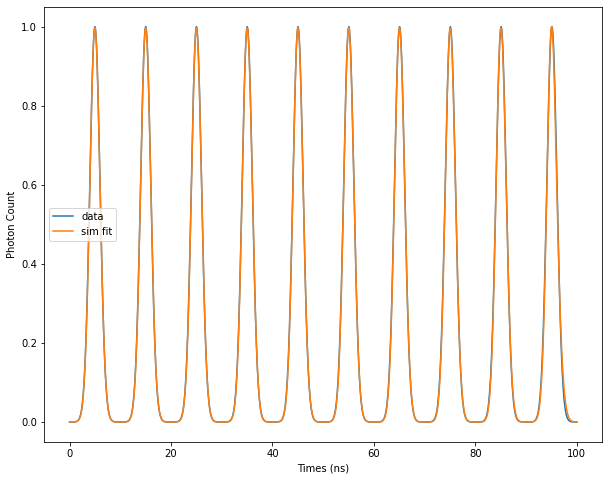

In [145]:
# fit above photon intensity
fits, popt10, pcov10 = cavity.retro_n_gauss(time, pulse10, sigmas10, fit_print = True) # from single_photon_model

In [146]:
fits # the fitted values. amps in units of |\Omega|^2$

{'amps': array([0.13802546, 0.15375014, 0.17355634, 0.19922256, 0.23373763,
        0.28273487, 0.35770699, 0.48696041, 0.76425895, 1.87674814]),
 'means': array([4.88454638, 4.88828169, 4.89296129, 4.89902286, 4.90722485,
        4.91886091, 4.93655344, 4.96753066, 5.03525266, 5.34622523]),
 'sigmas': array([0.99192474, 0.99187276, 0.99154477, 0.99112044, 0.99087418,
        0.99084463, 0.99124813, 0.99304682, 1.00072254, 1.06856356])}

Text(0.5, 0, 'Time (ns)')

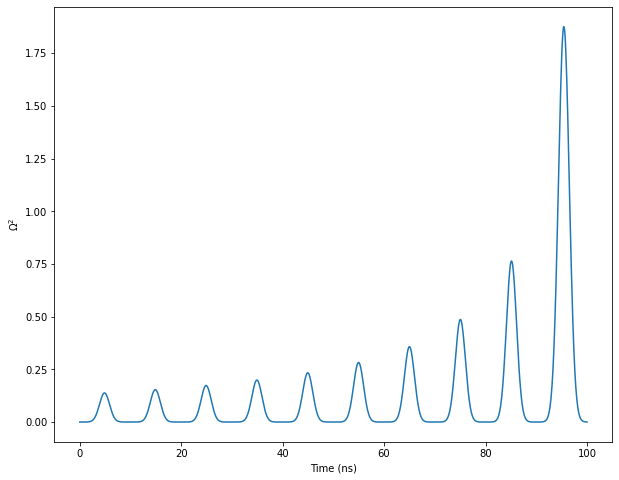

In [148]:
plot(time, spm.n_gaussian(time, *popt10))
ylabel("$\Omega^2$")
xlabel("Time (ns)")

### fitting 10 pulse from data

In [114]:
dat_phot10 = np.loadtxt("10-peaked-data/Photon/sweeper_single-photons_14_59_43.txt")

In [115]:
dat_phot10x = np.loadtxt("10-peaked-data/Photon/sweeper_single-photons_x_14_59_43.txt")

(100.0, 820.0)

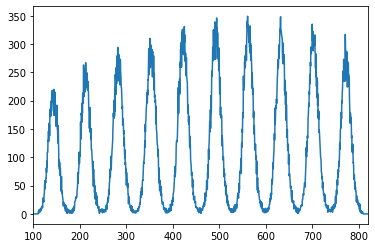

In [117]:
plot(dat_phot10x, dat_phot10)
xlim(100, 820)

In [118]:
x10 = dat_phot10x[np.where((dat_phot10x > 100)*(dat_phot10x < 820))]
y10 = dat_phot10[np.where((dat_phot10x > 100)*(dat_phot10x < 820))]

x10 = x10 - x10[0]
y10 = y10/max(y10)

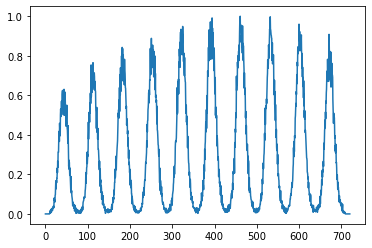

In [119]:
plot(x10, y10)

In [121]:
p0a = [0.6, 0.8, 0.82, 0.9, 0.95, 1, 1, 1, 0.95, 0.9]

In [126]:
popt, pcov = curve_fit(spm.n_gaussian, x10, y10, p0 = [*p0a, *[35]*10, *[7]*10])

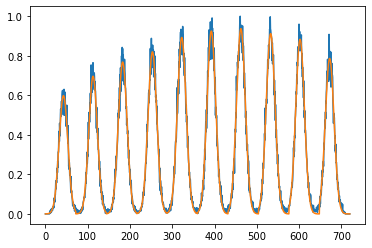

In [127]:
plot(x10, y10)
plot(x10, spm.n_gaussian(x10, *popt))

### now retrofit the fitted photon pulse

In [128]:
phot10r = spm.n_gaussian(x10, *popt)

[42.52126063031517, 41.02051025512756, 39.519759879939954, 38.519259629814854, 36.51825912956474, 34.5172586293146, 33.01650825412702, 32.01600800400195, 30.015007503751804, 28.514257128564168]
(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 42.52126063031517, 41.02051025512756, 39.519759879939954, 38.519259629814854, 36.51825912956474, 34.5172586293146, 33.01650825412702, 32.01600800400195, 30.015007503751804, 28.514257128564168, 10.448392997072675, 10.23709185832153, 10.398937195035586, 10.40978554600913, 10.461773502134232, 10.369781179084793, 10.386565070969123, 10.520584837611032, 10.283070233570182, 10.420696644753061)
(0.1000000001, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 42.52126063031517, 41.02051025512756, 39.519759879939954

(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 42.52126063031517, 41.02051025512756, 39.519759879939954, 38.519259629814854, 40.170085042521215, 34.5172586293146, 33.01650825412702, 32.01600800400195, 30.015007503751804, 28.514257128564168, 10.448392997072675, 10.23709185832153, 10.398937195035586, 10.40978554600913, 10.461773502134232, 10.369781179084793, 10.386565070969123, 10.520584837611032, 10.283070233570182, 10.420696644753061)
(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 42.52126063031517, 41.02051025512756, 39.519759879939954, 38.519259629814854, 36.51825912956474, 37.96898449224606, 33.01650825412702, 32.01600800400195, 30.015007503751804, 28.514257128564168, 10.448392997072675, 10.23709185832153, 10.398937195035586, 10.

(1e-10, 0.07777777777777778, 0.15555555555555556, 0.23333333333333334, 0.3111111111111111, 0.3888888888888889, 0.4666666666666667, 0.5444444444444445, 0.6222222222222222, 0.7, 42.52126063031517, 41.02051025512756, 39.519759879939954, 38.519259629814854, 36.51825912956474, 34.5172586293146, 33.01650825412702, 32.01600800400195, 30.015007503751804, 28.514257128564168, 10.448392997072675, 10.23709185832153, 10.398937195035586, 10.40978554600913, 10.461773502134232, 10.369781179084793, 10.386565070969123, 10.520584837611032, 10.283070233570182, 11.462766309228368)
(0.044573320142434425, 0.036934921887365274, 0.07807419153044448, 0.09883651867160581, 0.08954963862558238, 0.08622068582598691, 3.7778279835156505, 0.17045814440187818, 0.2425679227630727, 0.614626840467556, 43.11928788701996, 40.58546360749147, 39.156713770721325, 38.82382029592036, 40.35242695027659, 41.44655832629959, 43.51199956788729, 9.08589789526134, 15.571636791580337, 6.8973064997468825, 4.430573216207116, 9.65901462647

(0.056604743834448, 0.02573975618591485, 0.05700935144877828, 0.06027520891487839, 0.029562855082385542, 0.22156071432423427, 0.5456202610597202, 0.5255371127033126, 0.6099642663668138, 0.6992653244096891, 42.522634588060164, 36.50054080186592, 39.11164603468237, 38.879179331029704, 38.05790319260032, 34.90452449662885, 33.0233398306408, 31.964154749247253, 30.00499402169902, 28.484882655602224, 10.406476633911867, 9.538525488466112, 8.469785828551856, 6.338546845484879, 5.515701126398832, 9.14408923630449, 10.30770985020775, 10.521351026315525, 10.28450695118549, 10.399391562496813)
(0.056604743834448, 0.02573975618591485, 0.05700935144877828, 0.06027520891487839, 0.029562855082385542, 0.22156071432423427, 0.5456202610597202, 0.5255371127033126, 0.6099642663668138, 0.6992653244096891, 42.522634588060164, 40.55615644651768, 43.02281063815061, 38.879179331029704, 38.05790319260032, 34.90452449662885, 33.0233398306408, 31.964154749247253, 30.00499402169902, 28.484882655602224, 10.4064766

(0.056604743834448, 0.02573975618591485, 0.05700935144877828, 0.06027520891487839, 0.029562855082385542, 0.22156071432423427, 0.5456202610597202, 0.5255371127033126, 0.6099642663668138, 0.6992653244096891, 42.522634588060164, 40.55615644651768, 39.11164603468237, 38.879179331029704, 38.05790319260032, 34.90452449662885, 33.0233398306408, 31.964154749247253, 30.00499402169902, 28.484882655602224, 10.406476633911867, 9.538525488466112, 8.469785828551856, 6.338546845484879, 5.515701126398832, 10.058498159934938, 10.30770985020775, 10.521351026315525, 10.28450695118549, 10.399391562496813)
(0.056604743834448, 0.02573975618591485, 0.05700935144877828, 0.06027520891487839, 0.029562855082385542, 0.22156071432423427, 0.5456202610597202, 0.5255371127033126, 0.6099642663668138, 0.6992653244096891, 42.522634588060164, 40.55615644651768, 39.11164603468237, 38.879179331029704, 38.05790319260032, 34.90452449662885, 33.0233398306408, 31.964154749247253, 30.00499402169902, 28.484882655602224, 10.40647

(0.01811751378955854, 0.020413106197289546, 0.02547825093747738, 0.037808604772909364, 0.12816622764374513, 0.10912463146536365, 0.2452129751826837, 0.10372043337108511, 3.7265187654273033, 0.6551121810602826, 40.54084601877708, 41.35809761251609, 38.30336250611975, 36.83123205007003, 33.83582785526792, 32.96228611906046, 37.9795535297604, 36.32336755009953, 29.504618099804834, 28.099119501698656, 6.950104516142138, 6.7409816096279815, 6.553778443681628, 8.584453997104896, 8.347743272589177, 6.987623994097495, 5.967076293386853, 4.269493466778822, 9.541416551002612, 10.399358921665037)
(0.01811751378955854, 0.020413106197289546, 0.02547825093747738, 0.037808604772909364, 0.12816622764374513, 0.10912463146536365, 0.2452129751826837, 0.10372043337108511, 3.387744332206639, 0.7551121810602826, 40.54084601877708, 41.35809761251609, 38.30336250611975, 36.83123205007003, 33.83582785526792, 32.96228611906046, 37.9795535297604, 36.32336755009953, 29.504618099804834, 28.099119501698656, 6.95010

(0.01811751378955854, 0.020413106197289546, 0.02547825093747738, 0.037808604772909364, 0.12816622764374513, 0.10912463146536365, 0.2452129751826837, 0.10372043337108511, 3.387744332206639, 0.6551121810602826, 40.54084601877708, 41.35809761251609, 38.30336250611975, 36.83123205007003, 33.83582785526792, 32.96228611906046, 37.9795535297604, 36.32336755009953, 29.504618099804834, 28.099119501698656, 6.950104516142138, 6.7409816096279815, 7.20915628804979, 8.584453997104896, 8.347743272589177, 6.987623994097495, 5.967076293386853, 4.269493466778822, 9.541416551002612, 10.399358921665037)
(0.01811751378955854, 0.020413106197289546, 0.02547825093747738, 0.037808604772909364, 0.12816622764374513, 0.10912463146536365, 0.2452129751826837, 0.10372043337108511, 3.387744332206639, 0.6551121810602826, 40.54084601877708, 41.35809761251609, 38.30336250611975, 36.83123205007003, 33.83582785526792, 32.96228611906046, 37.9795535297604, 36.32336755009953, 29.504618099804834, 28.099119501698656, 6.9501045

(0.009791321684760075, 0.013537515157196516, 0.018660247738793177, 0.029262844898872778, 0.04986373687426923, 0.2165649781036621, 0.054868077274113664, 0.5968911814175579, 2.519345144118183, 0.034056331234096016, 41.99879281150653, 41.26217499461992, 38.35497484400684, 37.14408884346928, 35.09957728012935, 33.50916686043515, 31.910626205961815, 26.055087772101857, 34.40595236398363, 19.107740180106966, 9.628107079260374, 9.656636264078593, 9.604608483784608, 10.28884780591674, 8.508288380544402, 6.458715937380968, 8.314221274330219, 7.673715444949549, 7.283068575902305, 5.283453539995484)
(0.009791321684760075, 0.013537515157196516, 0.018660247738793177, 0.029262844898872778, 0.04986373687426923, 0.11656497810366208, 0.15486807727411367, 0.5968911814175579, 2.519345144118183, 0.034056331234096016, 41.99879281150653, 41.26217499461992, 38.35497484400684, 37.14408884346928, 35.09957728012935, 33.50916686043515, 31.910626205961815, 26.055087772101857, 34.40595236398363, 19.107740180106966

(0.009791321684760075, 0.013537515157196516, 0.018660247738793177, 0.029262844898872778, 0.04986373687426923, 0.11656497810366208, 0.054868077274113664, 0.5968911814175579, 2.519345144118183, 0.034056331234096016, 41.99879281150653, 41.26217499461992, 38.35497484400684, 37.14408884346928, 35.09957728012935, 33.50916686043515, 31.910626205961815, 26.055087772101857, 34.40595236398363, 19.107740180106966, 10.590917787186411, 9.656636264078593, 9.604608483784608, 10.28884780591674, 8.508288380544402, 6.458715937380968, 8.314221274330219, 7.673715444949549, 7.283068575902305, 5.283453539995484)
(0.009791321684760075, 0.013537515157196516, 0.018660247738793177, 0.029262844898872778, 0.04986373687426923, 0.11656497810366208, 0.054868077274113664, 0.5968911814175579, 2.519345144118183, 0.034056331234096016, 41.99879281150653, 41.26217499461992, 38.35497484400684, 37.14408884346928, 35.09957728012935, 33.50916686043515, 31.910626205961815, 26.055087772101857, 34.40595236398363, 19.107740180106

(0.007911175775454438, 0.011355398524378476, 0.015432472167081896, 0.12088907491985995, 0.031192360363877503, 0.05383126919875236, 0.18187710140226834, 0.39624388550033196, 1.253155667502722, 4.016067956249705, 42.9239156368991, 41.716469806749465, 38.10845896226748, 36.879221446712265, 34.858039935449284, 34.04928899418782, 33.35050527998083, 28.758330813512778, 37.86934418391614, 0.09553870090053351, 10.857838755003007, 10.777626802428307, 10.68991836213563, 10.881289659605308, 9.866913511176953, 7.9041522243546245, 8.518034838480528, 7.758626323017121, 2.993202367588392, 0.16627489899044612)
(0.007911175775454438, 0.011355398524378476, 0.015432472167081896, 0.020889074919859946, 0.13119236036387752, 0.05383126919875236, 0.18187710140226834, 0.39624388550033196, 1.253155667502722, 4.016067956249705, 42.9239156368991, 41.716469806749465, 38.10845896226748, 36.879221446712265, 34.858039935449284, 34.04928899418782, 33.35050527998083, 28.758330813512778, 37.86934418391614, 0.09553870090

(0.007911175775454438, 0.011355398524378476, 0.015432472167081896, 0.020889074919859946, 0.031192360363877503, 0.05383126919875236, 0.18187710140226834, 0.39624388550033196, 1.253155667502722, 4.016067956249705, 42.9239156368991, 41.716469806749465, 38.10845896226748, 36.879221446712265, 34.858039935449284, 34.04928899418782, 33.35050527998083, 31.634163894864056, 37.86934418391614, 0.09553870090053351, 10.857838755003007, 10.777626802428307, 10.68991836213563, 10.881289659605308, 9.866913511176953, 7.9041522243546245, 8.518034838480528, 7.758626323017121, 2.993202367588392, 0.16627489899044612)
(0.007911175775454438, 0.011355398524378476, 0.015432472167081896, 0.020889074919859946, 0.031192360363877503, 0.05383126919875236, 0.18187710140226834, 0.39624388550033196, 1.253155667502722, 4.016067956249705, 42.9239156368991, 41.716469806749465, 38.10845896226748, 36.879221446712265, 34.858039935449284, 34.04928899418782, 33.35050527998083, 28.758330813512778, 41.65627860230776, 0.095538700

(0.10571373887128248, 0.008607908090099597, 0.012015234200989808, 0.017350652166842583, 0.02867857194303716, 0.042267121056261577, 0.07269027158990442, 0.20893924908841702, 1.6174119333371755, 4.005108242689735, 42.938238178689446, 41.7280550251459, 37.828127831249994, 36.41351284726469, 34.206457517328886, 32.70993625135806, 32.812312911768956, 30.461062301538497, 37.0391604544049, 0.09439157170261697, 10.94586190895829, 10.914900227974318, 10.894341225382089, 11.06847845393912, 10.488393458477491, 9.591530899299574, 9.585881305350956, 7.289277484014957, 4.307864151443555, 0.16570734649064023)
(0.005713738871282473, 0.1086079080900996, 0.012015234200989808, 0.017350652166842583, 0.02867857194303716, 0.042267121056261577, 0.07269027158990442, 0.20893924908841702, 1.6174119333371755, 4.005108242689735, 42.938238178689446, 41.7280550251459, 37.828127831249994, 36.41351284726469, 34.206457517328886, 32.70993625135806, 32.812312911768956, 30.461062301538497, 37.0391604544049, 0.09439157170

(0.005713738871282473, 0.008607908090099597, 0.012015234200989808, 0.017350652166842583, 0.02867857194303716, 0.042267121056261577, 0.07269027158990442, 0.20893924908841702, 1.6174119333371755, 4.005108242689735, 42.938238178689446, 41.7280550251459, 37.828127831249994, 36.41351284726469, 37.62710326906178, 32.70993625135806, 32.812312911768956, 30.461062301538497, 37.0391604544049, 0.09439157170261697, 10.94586190895829, 10.914900227974318, 10.894341225382089, 11.06847845393912, 10.488393458477491, 9.591530899299574, 9.585881305350956, 7.289277484014957, 4.307864151443555, 0.16570734649064023)
(0.005713738871282473, 0.008607908090099597, 0.012015234200989808, 0.017350652166842583, 0.02867857194303716, 0.042267121056261577, 0.07269027158990442, 0.20893924908841702, 1.6174119333371755, 4.005108242689735, 42.938238178689446, 41.7280550251459, 37.828127831249994, 36.41351284726469, 34.206457517328886, 35.98092987649387, 32.812312911768956, 30.461062301538497, 37.0391604544049, 0.094391571

(0.005713738871282473, 0.008607908090099597, 0.012015234200989808, 0.017350652166842583, 0.02867857194303716, 0.042267121056261577, 0.07269027158990442, 0.20893924908841702, 1.6174119333371755, 4.005108242689735, 42.938238178689446, 41.7280550251459, 37.828127831249994, 36.41351284726469, 34.206457517328886, 32.70993625135806, 32.812312911768956, 30.461062301538497, 37.0391604544049, 0.09439157170261697, 10.94586190895829, 10.914900227974318, 10.894341225382089, 11.06847845393912, 10.488393458477491, 9.591530899299574, 9.585881305350956, 7.289277484014957, 4.738650566587911, 0.16570734649064023)
(0.005713738871282473, 0.008607908090099597, 0.012015234200989808, 0.017350652166842583, 0.02867857194303716, 0.042267121056261577, 0.07269027158990442, 0.20893924908841702, 1.6174119333371755, 4.005108242689735, 42.938238178689446, 41.7280550251459, 37.828127831249994, 36.41351284726469, 34.206457517328886, 32.70993625135806, 32.812312911768956, 30.461062301538497, 37.0391604544049, 0.09439157

(0.006805581697519335, 0.010330495918534395, 0.014108619245131064, 0.01923266972119242, 0.028123870076939655, 0.04155390393305022, 0.06729245677963233, 0.15422091202595922, 1.291756697791028, 4.794697360945468, 43.34597293088367, 37.77081090992516, 38.59492216354923, 37.339125526775334, 35.19209518730227, 33.26380114518005, 31.500006907347764, 31.697025482515578, 39.183133062894306, 1.2763048333382265, 11.348802662160583, 11.294613359273228, 11.256044302759191, 11.286407229883434, 10.885696071314056, 10.305193269466022, 10.181707708990348, 8.394684125373345, 6.013653553491182, 0.40918380117649944)
(0.006805581697519335, 0.010330495918534395, 0.014108619245131064, 0.01923266972119242, 0.028123870076939655, 0.04155390393305022, 0.06729245677963233, 0.15422091202595922, 1.291756697791028, 4.794697360945468, 43.34597293088367, 41.967567677694625, 42.45441437990415, 37.339125526775334, 35.19209518730227, 33.26380114518005, 31.500006907347764, 31.697025482515578, 39.183133062894306, 1.276304

(0.006805581697519335, 0.010330495918534395, 0.014108619245131064, 0.01923266972119242, 0.028123870076939655, 0.04155390393305022, 0.06729245677963233, 0.15422091202595922, 1.291756697791028, 4.794697360945468, 43.34597293088367, 41.967567677694625, 38.59492216354923, 37.339125526775334, 35.19209518730227, 33.26380114518005, 31.500006907347764, 31.697025482515578, 39.183133062894306, 1.2763048333382265, 11.348802662160583, 11.294613359273228, 11.256044302759191, 11.286407229883434, 10.885696071314056, 11.335712596412623, 10.181707708990348, 8.394684125373345, 6.013653553491182, 0.40918380117649944)
(0.006805581697519335, 0.010330495918534395, 0.014108619245131064, 0.01923266972119242, 0.028123870076939655, 0.04155390393305022, 0.06729245677963233, 0.15422091202595922, 1.291756697791028, 4.794697360945468, 43.34597293088367, 41.967567677694625, 38.59492216354923, 37.339125526775334, 35.19209518730227, 33.26380114518005, 31.500006907347764, 31.697025482515578, 39.183133062894306, 1.27630

(0.007296516951127324, 0.010645629750599385, 0.014037683265334729, 0.01844298487886967, 0.02606038897411692, 0.037597425679023674, 0.06066050686955813, 0.13064653998676654, 1.1845226963006403, 1.062567891960978, 43.43988548877824, 41.22647905642173, 38.134031538029, 36.73703197420878, 34.50895030860811, 32.962153852638025, 31.690069418111072, 31.458457632922343, 40.802473723210234, 2.8350577082859516, 11.458199905588597, 11.406396528839032, 11.372666772104926, 11.371066235626179, 11.08803523565709, 10.66347925454161, 10.528567247267054, 9.161497653929763, 7.662321919931209, 1.4086825449515072)
(0.007296516951127324, 0.010645629750599385, 0.014037683265334729, 0.01844298487886967, 0.02606038897411692, 0.037597425679023674, 0.06066050686955813, 0.13064653998676654, 1.076838814818764, 1.1688246811570757, 43.43988548877824, 41.22647905642173, 38.134031538029, 36.73703197420878, 34.50895030860811, 32.962153852638025, 31.690069418111072, 31.458457632922343, 40.802473723210234, 2.835057708285

(0.007296516951127324, 0.010645629750599385, 0.014037683265334729, 0.01844298487886967, 0.02606038897411692, 0.037597425679023674, 0.06066050686955813, 0.13064653998676654, 1.076838814818764, 1.062567891960978, 43.43988548877824, 41.22647905642173, 38.134031538029, 36.73703197420878, 34.50895030860811, 32.962153852638025, 31.690069418111072, 31.458457632922343, 40.802473723210234, 2.8350577082859516, 11.458199905588597, 11.406396528839032, 10.235400094894434, 11.371066235626179, 11.08803523565709, 10.66347925454161, 10.528567247267054, 9.161497653929763, 7.662321919931209, 1.4086825449515072)
(0.007296516951127324, 0.010645629750599385, 0.014037683265334729, 0.01844298487886967, 0.02606038897411692, 0.037597425679023674, 0.06066050686955813, 0.13064653998676654, 1.076838814818764, 1.062567891960978, 43.43988548877824, 41.22647905642173, 38.134031538029, 36.73703197420878, 34.50895030860811, 32.962153852638025, 31.690069418111072, 31.458457632922343, 40.802473723210234, 2.83505770828595

(0.007279877579461168, 0.010621770380023463, 0.014007573687895713, 0.0184059277782608, 0.02601344491350699, 0.03754000202888197, 0.06059300853060759, 0.13057677114462604, 1.0767502557092206, 1.0625678789334723, 43.43988549991517, 41.22647959871728, 38.13402923461128, 36.73702937478595, 34.50894582015584, 32.96214383130772, 31.690055802233132, 31.458434641950692, 40.80211565846743, 2.8350582434462344, 11.458199980604762, 11.406396725822349, 11.372667160300894, 11.371066779509322, 11.08803781257508, 10.663487369552039, 10.528583040286335, 9.16159285619413, 7.662521697897438, 1.408683251887015)
(0.007292354677176938, 0.010639662045732754, 0.014030152802519905, 0.018433717614383855, 0.026048650401545102, 0.037583068970426126, 0.06064363605767756, 0.1306291090728053, 1.0768167175941414, 1.0625678887212484, 43.43988549155391, 41.22647919159865, 38.13403096450004, 36.73703132753092, 34.50894919206069, 32.96215135945086, 31.690066030116878, 31.45845190293063, 40.8023847589581, 2.83505784138217

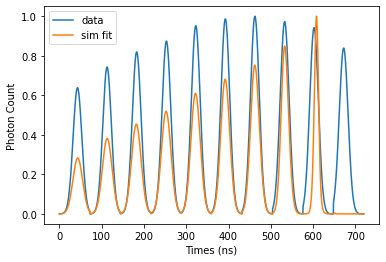

In [129]:
fits_dat, popt_d, pcov_d = cavity.retro_n_gauss(x10, phot10r, popt[2*10:], fit_print = True) # from single_photon_model

In [37]:
pul_phot10 = np.loadtxt("10-peaked-data/Pulse/sweeper_single-photons_14_37_46.txt")

In [38]:
pul_phot10_x = np.loadtxt("10-peaked-data/Pulse/sweeper_single-photons_x_14_37_46.txt")

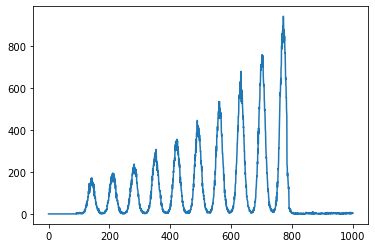

In [39]:
plot(pul_phot10_x, pul_phot10)

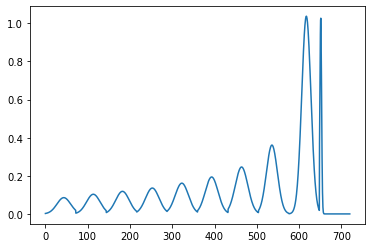

In [136]:
# simulated pulse
plot(x10, spm.sqrt_n_gaussian(x10, *popt_d))

### fitting square pulse

In [62]:
filesnew = ['15_57_48', '16_11_14', '18_07_23']

In [70]:
datx = np.loadtxt(f"10-15/sweeper_single-photons_x_{filesnew[0]}.txt")
daty = np.loadtxt(f"10-15/sweeper_single-photons_{filesnew[0]}.txt")

In [83]:
x = datx[np.where(datx >785)[0][0]:np.where(datx >850)[0][0]]
y = daty[np.where(datx >785)[0][0]:np.where(datx >850)[0][0]]
x = x - x[0]
norm = max(savgol_filter(y, 53, 3))
y = y/norm

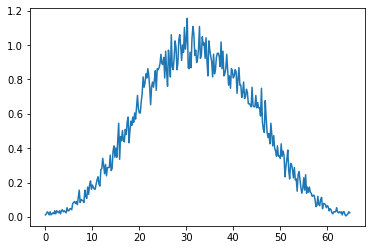

In [84]:
plot(x, y)

(0.3947841760435743, 33.0, 22.0)
(0.4947841760435743, 33.0, 22.0)
(0.3947841760435743, 29.7, 22.0)
(0.3947841760435743, 33.0, 24.2)
(0.2078820035981069, 33.75835729371687, 6.871760129596543)
(0.3078820035981069, 33.75835729371687, 6.871760129596543)
(0.2078820035981069, 30.382521564345183, 6.871760129596543)
(0.2078820035981069, 33.75835729371687, 7.558936142556198)
(0.14604751722699377, 34.13269012681578, 12.1452593286675)
(0.24604751722699378, 34.13269012681578, 12.1452593286675)
(0.14604751722699377, 30.719421114134203, 12.1452593286675)
(0.14604751722699377, 34.13269012681578, 13.359785261534249)
(0.13150392386132426, 34.37977665537791, 16.15848907514805)
(0.23150392386132426, 34.37977665537791, 16.15848907514805)
(0.13150392386132426, 30.94179898984012, 16.15848907514805)
(0.13150392386132426, 34.37977665537791, 17.774337982662857)
(0.11856053360031536, 34.39658045577628, 19.393162604036302)
(0.21856053360031535, 34.39658045577628, 19.393162604036302)
(0.11856053360031536, 30.9569

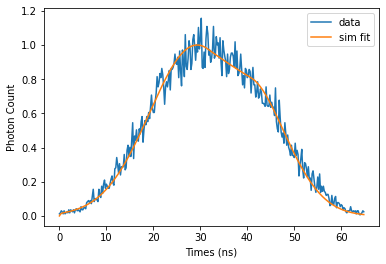

In [85]:
p0 = [(2*np.pi*0.1)**2, 33, 22] # we are fitting the amplitude for omega squared
popt, pcov = cavity.fit_data(spm.sqrt_sq_pulse, x, y, p0, bounds=([0, 0, 0], [0.5, 35, 30]),\
                             fit_print = True, method = 'trf', diff_step = 0.1)

Text(0, 0.5, '$\\Omega^2$')

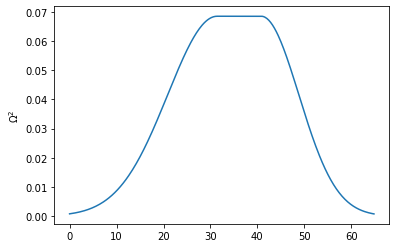

In [89]:
plot(x, spm.square_pulse(x, *popt))
ylabel("$\Omega^2$")

This can be a little bit finnicky. Consider setting different bounds on the data. Too wide:

In [91]:
x, y = sanitize_data(x, y)

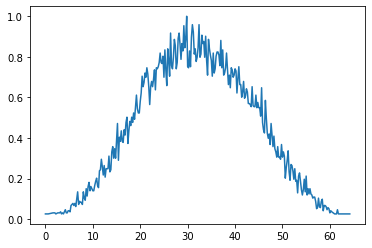

In [92]:
plot(x, y)

In [93]:
popt, pcov = cavity.fit_data(spm.sqrt_sq_pulse, x, y, p0, bounds=([0, 0, 0], [0.5, 35, 30]),\
                             fit_print = True, method = 'trf', diff_step = 0.1)

(0.3947841760435743, 33.0, 22.0)
(0.4947841760435743, 33.0, 22.0)
(0.3947841760435743, 29.7, 22.0)


C:\Users\Wenjie\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\_ode.py:1009: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  self.messages.get(istate, unexpected_istate_msg)))


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

Or too narrow:

In [101]:
x = datx[np.where(daty > 0.05*max(daty))]
y = daty[np.where(daty > 0.05*max(daty))]
x = x - x[0]
y = y/max(y)

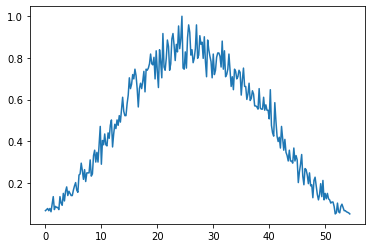

In [102]:
plot(x, y)

(0.06845520799186341, 31.60612417706391, 24.051216128991534)
(0.16845520799186342, 31.60612417706391, 24.051216128991534)
(0.06845520799186341, 28.44551175935752, 24.051216128991534)
(0.06845520799186341, 31.60612417706391, 26.45633774189069)
(0.10465796869194706, 27.933587310122242, 22.94969866829239)
(0.20465796869194708, 27.933587310122242, 22.94969866829239)
(0.10465796869194706, 30.726946041134468, 22.94969866829239)
(0.10465796869194706, 27.933587310122242, 25.244668535121626)
(0.23624482807473723, 30.46588338602808, 16.060864011442025)
(0.3362448280747372, 30.46588338602808, 16.060864011442025)
(0.23624482807473723, 27.419295047425273, 16.060864011442025)
(0.23624482807473723, 30.46588338602808, 17.66695041258623)
(0.1885986879084056, 28.818207088250535, 12.261115986262663)
(0.2885986879084056, 28.818207088250535, 12.261115986262663)
(0.1885986879084056, 31.700027797075588, 12.261115986262663)
(0.1885986879084056, 28.818207088250535, 13.48722758488893)
(0.21848022676095963, 30.3

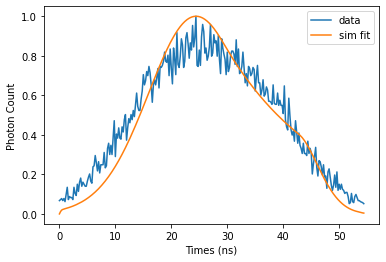

In [103]:
p0 = (0.06845520799186341, 31.60612417706391, 24.051216128991534)
popt, pcov = cavity.fit_data(spm.sqrt_sq_pulse, x, y, p0, bounds=([0, 0, 0], [0.5, 33, 33]),\
                             fit_print = True, method = 'trf', diff_step = 0.1)

## Functional form with integral

Text(0.5, 0, 'Time (ns)')

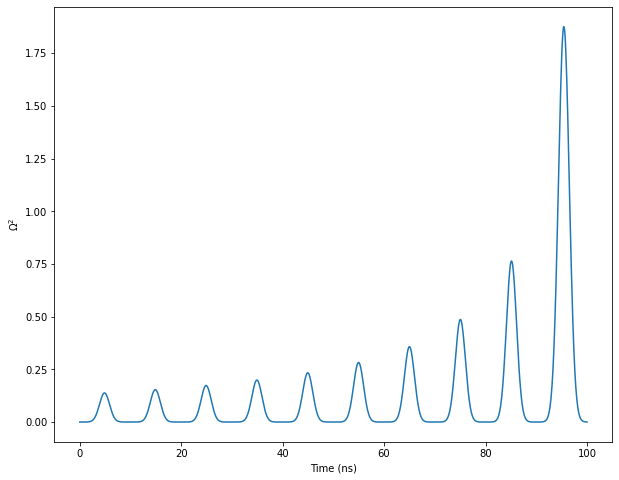

In [149]:
plot(time, spm.n_gaussian(time, *popt10))
ylabel("$\Omega^2$")
xlabel("Time (ns)")

In [160]:
integs = []
interv = int(len(time)/10)
pul = spm.n_gaussian(time, *popt10)

In [161]:
for i in range(10):
    if i < 9:
        gaus = pul[i*interv:(i+1)*interv]
        integs.append(simps(gaus, time[i*interv:(i+1)*interv]))
    else:
        gaus = pul[i*interv:]
        integs.append(simps(gaus, time[i*interv:(i+1)*interv]))

In [164]:
times10 = np.take(time, find_peaks(pul)[0])
amps10 = popt10[:10]

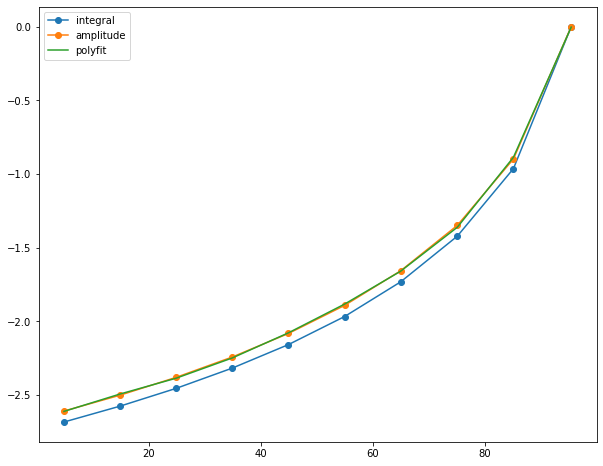

In [191]:
plot(times10, np.log(integs/max(integs)), marker = 'o', label = "integral")
plot(times10, np.log(amps10/max(amps10)), marker = 'o', label = "amplitude")
plot(times10, np.polyval(p, times10), label = "polyfit")
legend()
#yscale("log")

In [202]:
p = np.polyfit(times10, np.log(amps10/max(amps10)), 4)

In [203]:
p

array([ 1.08685783e-07, -1.60624565e-05,  8.82735332e-04, -5.37569021e-03,
       -2.59228683e+00])

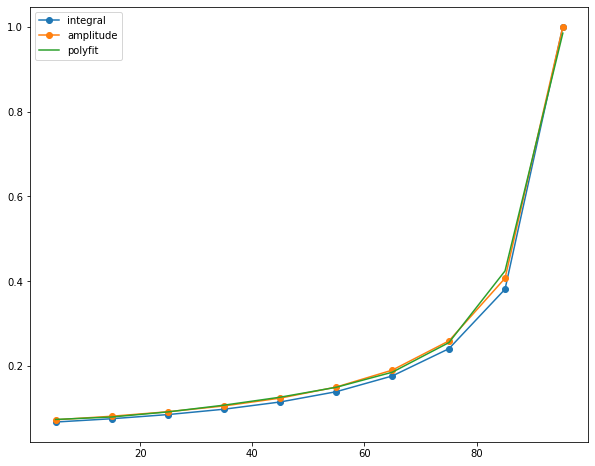

In [204]:
plot(times10, integs/max(integs), marker = 'o', label = "integral")
plot(times10, amps10/max(amps10), marker = 'o', label = "amplitude")
plot(times10, np.exp(np.polyval(p, times10)), label = "polyfit")
legend()

## fitting 2 pulse from data

In [33]:
dat_phot2 = np.loadtxt("2-peaked-data/Photon/sweeper_single-photons_20_24_49.txt")

In [34]:
dat_phot2x = np.loadtxt("2-peaked-data/Photon/sweeper_single-photons_x_20_24_56.txt")

(200.0, 1000.0)

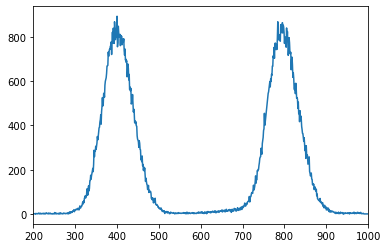

In [35]:
plot(dat_phot2x, dat_phot2)
xlim(200, 1000)

In [36]:
x2 = dat_phot2x[np.where((dat_phot2x > 200)*(dat_phot2x < 1000))]
y2 = dat_phot2[np.where((dat_phot2x > 200)*(dat_phot2x < 1000))]

x2 = x2 - x2[0]
y2 = y2/max(y2)

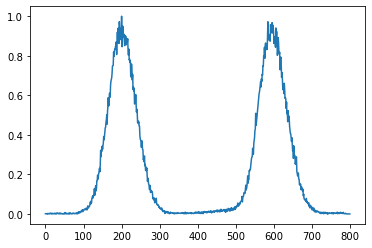

In [37]:
plot(x2, y2)

In [39]:
p0a = [1, 1]
popt, pcov = curve_fit(spm.n_gaussian, x2, y2, p0 = [*p0a, *[200]*2, *[70]*2])

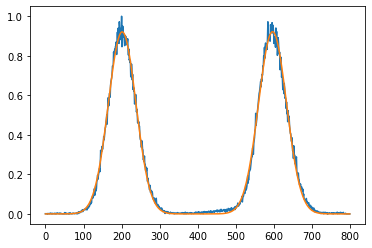

In [40]:
plot(x2, y2)
plot(x2, spm.n_gaussian(x2, *popt))

## retrofitting the above

In [43]:
times = np.linspace(0, 800, 2000)

In [47]:
phot2r = spm.n_gaussian(times, *popt)

[201.7008504252126, 196.8984492246123]
(1e-10, 0.7, 201.7008504252126, 196.8984492246123, 36.28628771886035, 36.78744074802395)
(0.1000000001, 0.7, 201.7008504252126, 196.8984492246123, 36.28628771886035, 36.78744074802395)
(1e-10, 0.7999999999999999, 201.7008504252126, 196.8984492246123, 36.28628771886035, 36.78744074802395)
(1e-10, 0.7, 181.53076538269133, 196.8984492246123, 36.28628771886035, 36.78744074802395)
(1e-10, 0.7, 201.7008504252126, 177.20860430215106, 36.28628771886035, 36.78744074802395)
(1e-10, 0.7, 201.7008504252126, 196.8984492246123, 32.657658946974315, 36.78744074802395)
(1e-10, 0.7, 201.7008504252126, 196.8984492246123, 36.28628771886035, 33.10869667322155)
(0.08512049544499971, 0.4312579668760162, 202.38813309914977, 195.37962509478558, 37.073229791830016, 35.24001972712772)
(0.1851204954449997, 0.4312579668760162, 202.38813309914977, 195.37962509478558, 37.073229791830016, 35.24001972712772)
(0.08512049544499971, 0.5312579668760162, 202.38813309914977, 195.379625

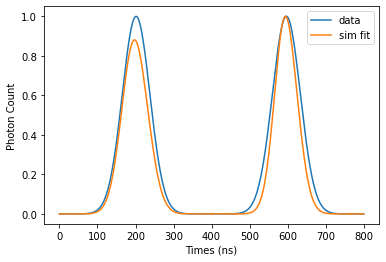

In [48]:
fits_dat2, popt_d2, pcov_d2 = cavity.retro_n_gauss(times, phot2r, popt[2*2:], fit_print = True) # from single_photon_model

In [49]:
pul_phot2 = np.loadtxt("2-peaked-data/Pulse/sweeper_single-photons_20_30_43.txt")

In [50]:
pul_phot2x = np.loadtxt("2-peaked-data/Pulse/sweeper_single-photons_x_20_30_43.txt")

In [52]:
x2p = pul_phot2x[np.where((dat_phot2x > 200)*(dat_phot2x < 1000))]
y2p = pul_phot2[np.where((dat_phot2x > 200)*(dat_phot2x < 1000))]

x2p = x2p - x2p[0]
y2p = y2p/max(y2p)

In [55]:
pul = spm.n_gaussian(times, *popt_d2)

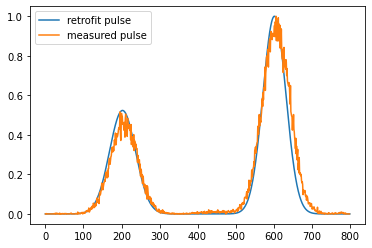

In [58]:
plot(times, pul/max(pul), label = "retrofit pulse")
plot(x2p, y2p, label = "measured pulse")
legend()